# Tutorial 8: performing refractive physical optics propagations.

In this eighth tutorial, we take a simple refractive optical system and perform physical optics (PO) propagation through the system.

In [252]:
%matplotlib widget
# Uncomment for interactive plots when running the notebook!
import numpy as np

from PyPO.System import System
from PyPO.Enums import FieldComponents, Projections, Objects


In [253]:

s = System()

2025-12-08 15:57:24 - WARNING - System override set to True. 


We create a Gaussian in freespace at -100 mm from the x-y plane

2025-12-08 16:28:12 - INFO - Added plane plane_focus to system. 
2025-12-08 16:28:12 - INFO - Translated element plane_focus by ('0.000e+00', '0.000e+00', '-2.500e+02') millimeters. 


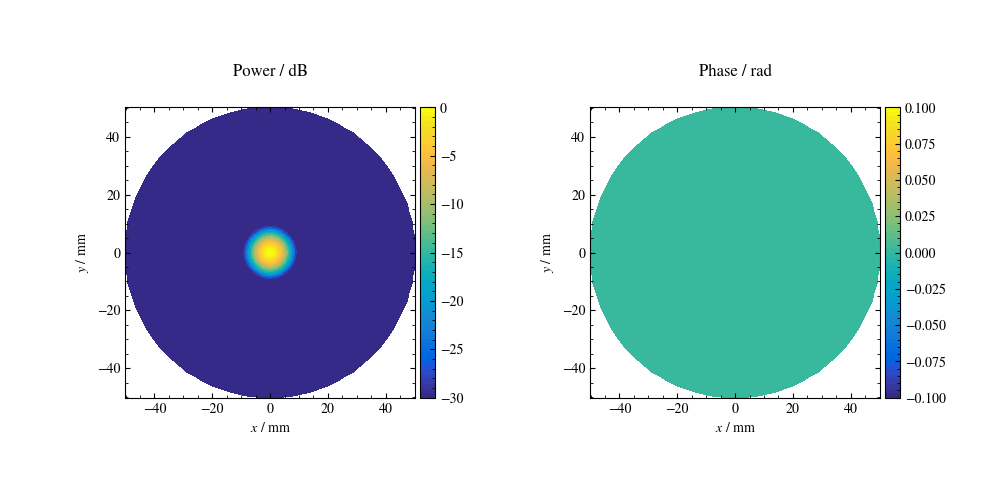

In [419]:
plane_focus = {
            "name"      : "plane_focus",
            "gmode"     : "uv",
            "lims_u"    : np.array([0, 50]),
            "lims_v"    : np.array([0, 360]),
            "gridsize"  : np.array([101, 100])
            }

s.addPlane(plane_focus)

GPODict = {                                                                                                                                                                     
    "name"      : "focus",                                                                                                                                  
    "lam"       : 1.0,                                                                                                      
    "w0x"       : 5,                                                                                             
    "w0y"       : 5,                                                                                             
    "n"         : 1,                                                                                                                             
    "E0"        : 1,                                                                                                                                  
    "dxyz"      : 0,                                                                                                 
    "pol"       : np.array([1, 0, 0])                                                                                                          
}



s.createGaussian(GPODict, "plane_focus")

s.translateGrids("plane_focus", np.array([0, 0, -250]))

s.plotBeam2D("focus", FieldComponents.Ex, vmin=-30, vmax=0)




We define a simple plano-convex lens in the z=0 plane, with the plane side towards the Gaussian beam source.

In [429]:
R1 = 100
R2 = -100
n = 3.11
d = 30

focal_length = 1/(1/R1 - 1/R2 + (n - 1)*d/(n*R1*R2))
print(focal_length)

55.66493645963844


In [430]:
# Input focus
f1 = 100

# Output focus
f2 = 1/(1/focal_length - 1/f1)
print(f2)

125.55510698425513


In [431]:
ellipsoid1 = {
            "name"      : "ellipse1",
            "pmode"     : "manual",
            "gmode"     : "uv",
            "flip"      : True,
            "coeffs"    : np.array([100, 100, -100]),
            "vertex"    : np.array([0, 0, -50]),
            "lims_u"    : np.array([0, 50]),
            "lims_v"    : np.array([0, 360]),
            "gridsize"  : np.array([301, 360])
            }

s.addEllipse(ellipsoid1)

s.translateGrids('ellipse1', np.array([0, 0, 100]))

ellipsoid2 = {
            "name"      : "ellipse2",
            "pmode"     : "manual",
            "gmode"     : "uv",
            "coeffs"    : np.array([100, 100, 100]),
            "vertex"    : np.array([0, 0, 50]),
            "lims_u"    : np.array([0, 50]),
            "lims_v"    : np.array([0, 360]),
            "gridsize"  : np.array([301, 360])
            }

s.addEllipse(ellipsoid2)

plane2 = {
            "name"      : "plane2",
            "gmode"     : "uv",
            "lims_u"    : np.array([0, 50]),
            "lims_v"    : np.array([0, 360]),
            "gridsize"  : np.array([301, 300])
          }

s.addPlane(plane2)

s.translateGrids('ellipse2', np.array([0, 0, -70]))

s.translateGrids('plane2', np.array([0, 0, 30]))

2025-12-08 16:28:44 - INFO - Added ellipsoid ellipse1 to system. 
2025-12-08 16:28:44 - INFO - Translated element ellipse1 by ('0.000e+00', '0.000e+00', '1.000e+02') millimeters. 
2025-12-08 16:28:44 - INFO - Added ellipsoid ellipse2 to system. 
2025-12-08 16:28:44 - INFO - Added plane plane2 to system. 
2025-12-08 16:28:44 - INFO - Translated element ellipse2 by ('0.000e+00', '0.000e+00', '-7.000e+01') millimeters. 
2025-12-08 16:28:44 - INFO - Translated element plane2 by ('0.000e+00', '0.000e+00', '3.000e+01') millimeters. 


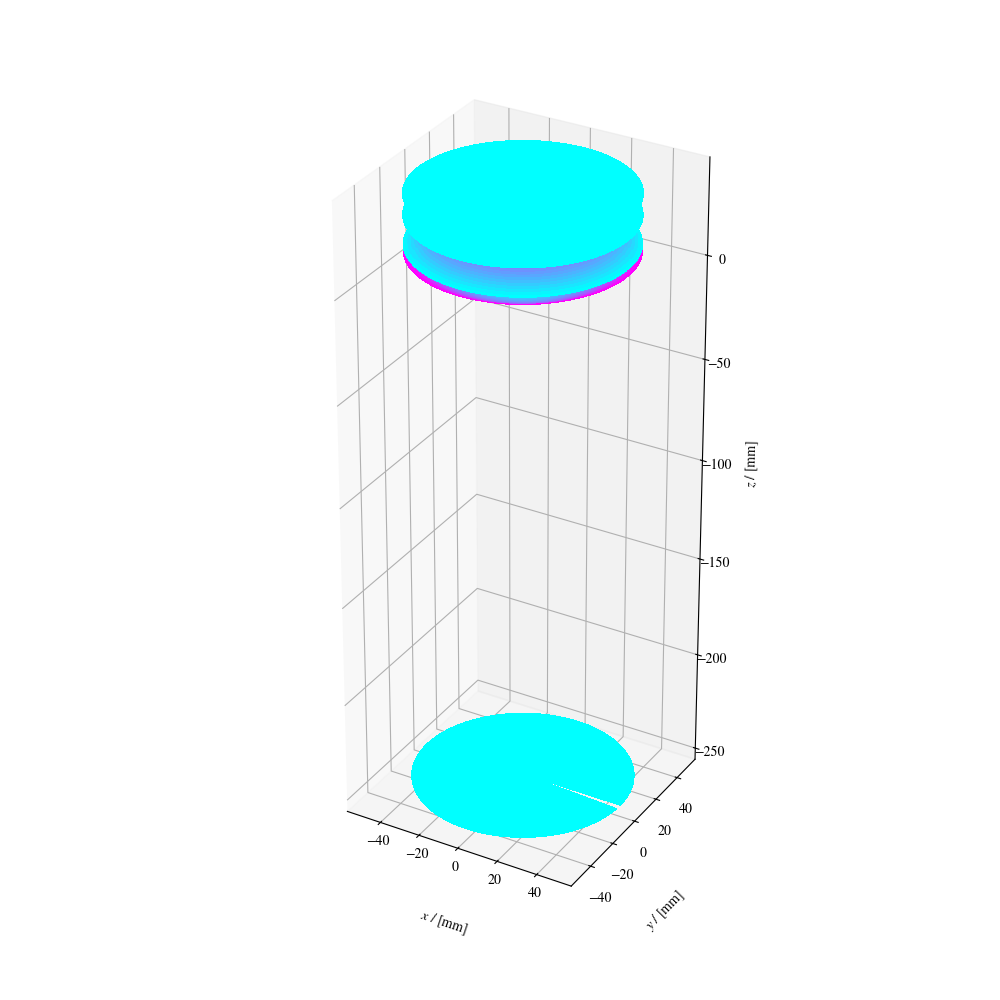

In [432]:
s.plotSystem()

In [433]:
focus_to_ellipse1_PO = {
    "t_name"      : "ellipse1",
    "s_current"   : "focus",
    "mode"        : "JMEH",
    "name_JM"     : "JM_ell1",
    "name_EH"     : "EH_ell1",
    "epsilon"     : 1.0
}

s.runPO(focus_to_ellipse1_PO)


2025-12-08 16:28:47 - WORK - *** Starting PO propagation *** 
2025-12-08 16:28:47 - WORK - Propagating focus on plane_focus to ellipse1, propagation mode: JMEH. 
2025-12-08 16:28:47 - WORK - Hardware: running 256 CUDA threads per block. 
2025-12-08 16:28:47 - WORK - ... Calculating ... 
2025-12-08 16:28:47 - WORK - *** Finished: 0.268 seconds *** 


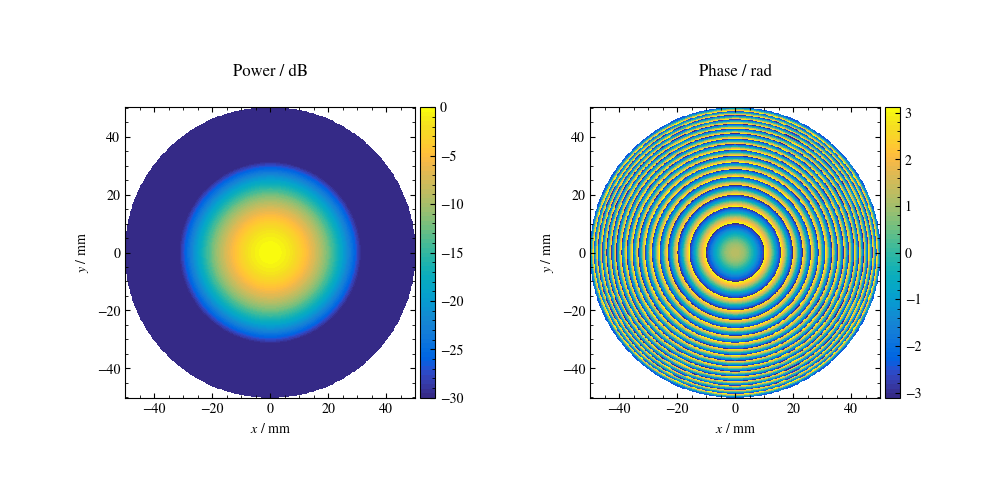

In [434]:
s.plotBeam2D('EH_ell1', FieldComponents.Ex, norm=False, vmin=-30)

In [435]:
ell1_to_plane2_PO = {
    "t_name"      : "plane2",
    "s_current"   : "JM_ell1",
    "mode"        : "JMEH",
    "name_JM"     : "JM_plane2",
    "name_EH"     : "EH_plane2",
    "epsilon"     : n**2
}

s.runPO(ell1_to_plane2_PO)

ell1_to_ell2_PO = {
    "t_name"      : "ellipse2",
    "s_current"   : "JM_ell1",
    "mode"        : "JMEH",
    "name_JM"     : "JM_ell2",
    "name_EH"     : "EH_ell2",
    "epsilon"     : n**2
}

s.runPO(ell1_to_ell2_PO)


2025-12-08 16:28:50 - WORK - *** Starting PO propagation *** 
2025-12-08 16:28:50 - WORK - Propagating JM_ell1 on ellipse1 to plane2, propagation mode: JMEH. 
2025-12-08 16:28:50 - WORK - Hardware: running 256 CUDA threads per block. 
2025-12-08 16:28:50 - WORK - ... Calculating ... 
2025-12-08 16:28:51 - WORK - *** Finished: 0.713 seconds *** 
2025-12-08 16:28:51 - WORK - *** Starting PO propagation *** 
2025-12-08 16:28:51 - WORK - Propagating JM_ell1 on ellipse1 to ellipse2, propagation mode: JMEH. 
2025-12-08 16:28:51 - WORK - Hardware: running 256 CUDA threads per block. 
2025-12-08 16:28:51 - WORK - ... Calculating ... 
2025-12-08 16:28:51 - WORK - *** Finished: 0.771 seconds *** 


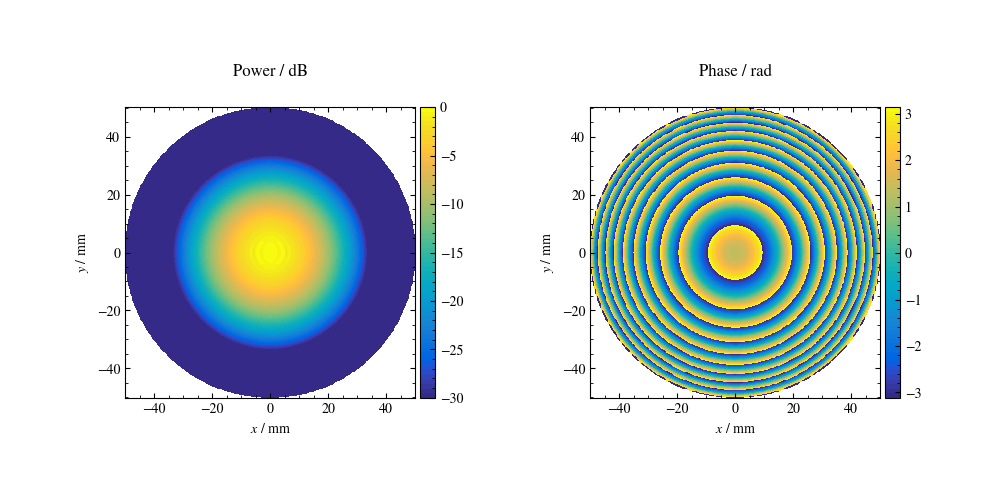

In [436]:
s.plotBeam2D('EH_ell2', FieldComponents.Ex, norm=False, vmin=-30)

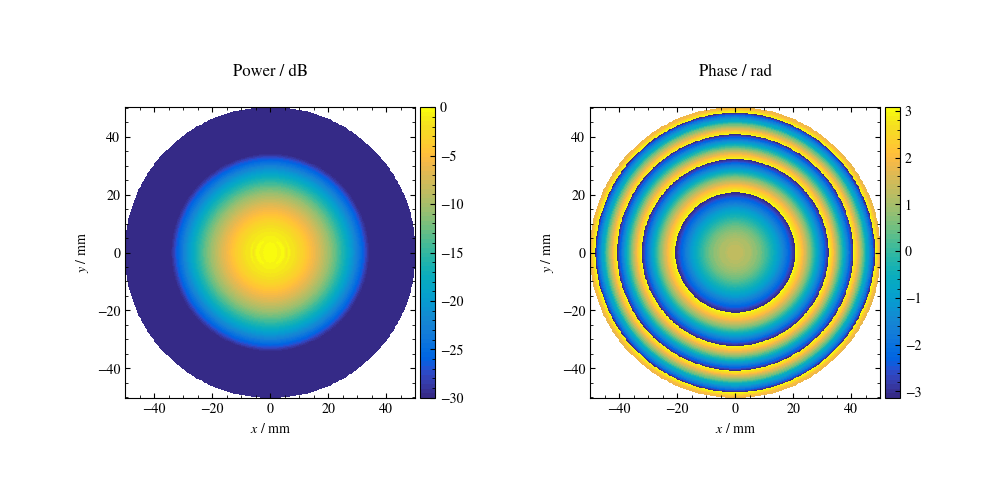

In [437]:
s.plotBeam2D('EH_plane2', FieldComponents.Ex, norm=False, vmin=-30)

In [438]:
# Add output plane
outplane = {
            "name"      : "outplane",
            "gmode"     : "uv",
            "lims_u"    : np.array([0, 50]),
            "lims_v"    : np.array([0, 360]),
            "gridsize"  : np.array([301, 360])
            }

s.addPlane(outplane)

s.translateGrids('outplane', np.array([0,0, 40]))

2025-12-08 16:29:05 - INFO - Added plane outplane to system. 
2025-12-08 16:29:05 - INFO - Translated element outplane by ('0.000e+00', '0.000e+00', '4.000e+01') millimeters. 


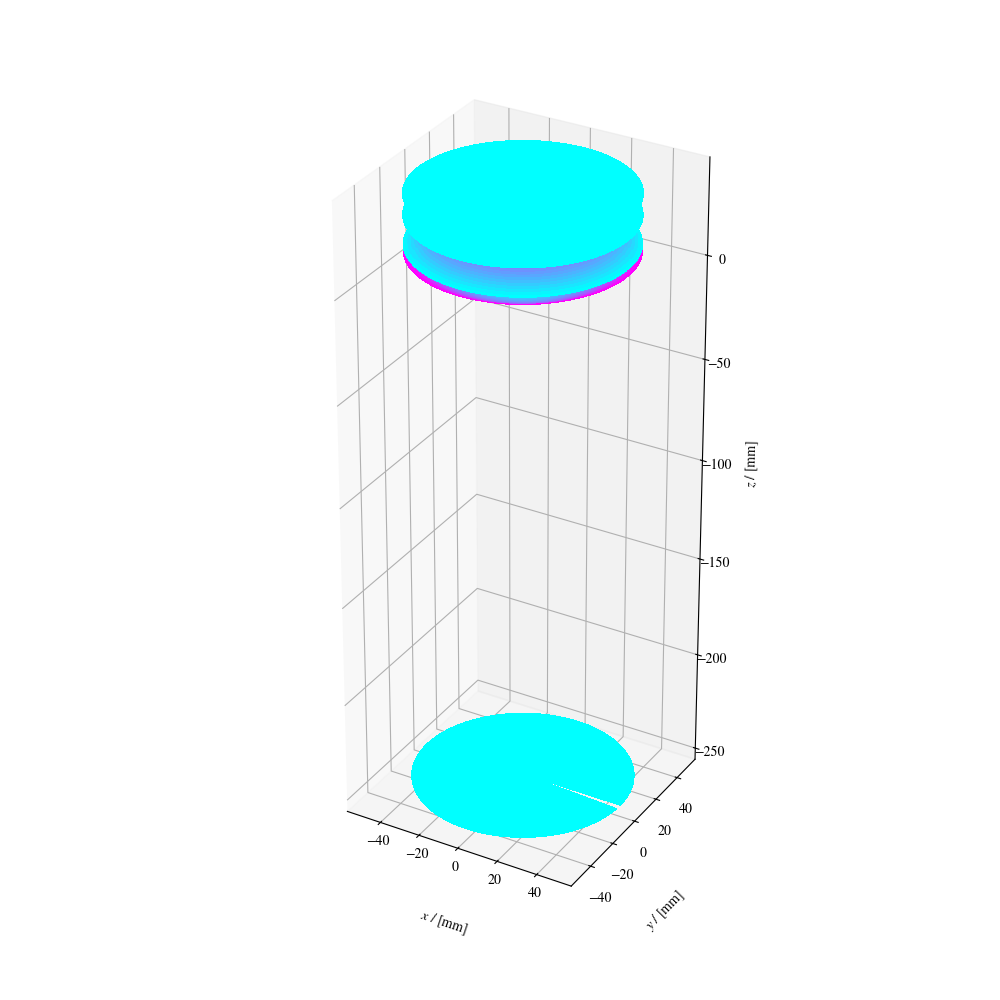

In [439]:
s.plotSystem()

In [440]:

ell_to_outplane_PO = {
    "t_name"      : "outplane",
    "s_current"   : "JM_ell2",
    "mode"        : "JMEH",
    "name_JM"     : "JM_out",
    "name_EH"     : "EH_out",
    "epsilon"     : 1.0
}

s.runPO(ell_to_outplane_PO)

2025-12-08 16:29:08 - WORK - *** Starting PO propagation *** 
2025-12-08 16:29:08 - WORK - Propagating JM_ell2 on ellipse2 to outplane, propagation mode: JMEH. 
2025-12-08 16:29:08 - WORK - Hardware: running 256 CUDA threads per block. 
2025-12-08 16:29:08 - WORK - ... Calculating ... 
2025-12-08 16:29:09 - WORK - *** Finished: 0.766 seconds *** 


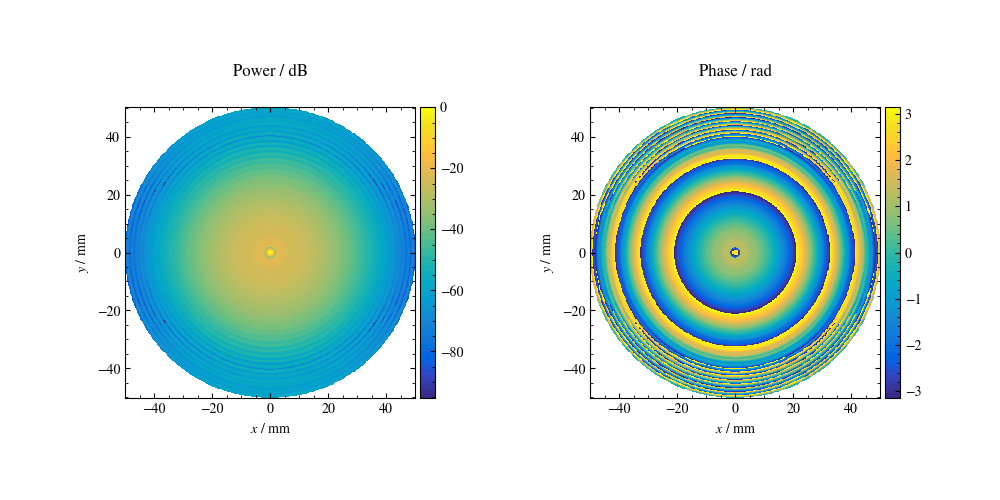

In [443]:
s.plotBeam2D("EH_out", FieldComponents.Ex, norm=False)